In [1]:
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import ticker as tkr
from matplotlib.cm import get_cmap
from cycler import cycler
import numpy as np
from scipy.optimize import curve_fit

# LaTeX page width for accurate sizing in inches
PAGE_WIDTH = 6.7
FIGSIZE = (PAGE_WIDTH, PAGE_WIDTH / 2)

# General Font settings
x = r'\usepackage[bitstream-charter, greekfamily=default]{mathdesign}'
rc('text.latex', preamble=x)
rc('text', usetex=True)
rc('font', **{'family': 'serif'})

# Font sizes (all relative to the base size defined, 12)
base = 12
rc('axes', titlesize=base - 2)
rc('legend', fontsize=base - 2)
rc('axes', labelsize=base - 2)
rc('xtick', labelsize=base - 3)
rc('ytick', labelsize=base - 3)

# Axis styles (if you want to repeat the linestyles and colors)
cycles = cycler('linestyle', ['-', '--', ':', '-.'])
cmap = get_cmap('gray')
cycles += cycler('color', cmap(list(np.linspace(0.1, 0.9, 4))))
rc('axes', prop_cycle=cycles)

$\underline{\text{Synthetic Data:}}$

$\underline{\text{SPMINI:}}$

In [2]:
# data to store:

# multi event models
# kernels
%  store -r G_starSPMINI_epsilons
%  store -r G_approxSPMINI_epsilons
%  store -r GNN_approxSPMINI_epsilons
%  store -r GNNPL_approx

# synthetic variograms
%  store -r synthetic_variogram_GstarSPMINI_approx_epsilons
%  store -r synthetic_variogram_GNN_approx_epsilons
%  store -r synthetic_variogram_GNNPL_approx

# R squared
% store -r R2_GstarSPMINI_approx_epsilons
% store -r R2_GNNSPMINI_approx_epsilons
% store -r R2_PowerModelGNNPL

# synthetic returns
% store -r YNN_SPMINI_epsilons
% store -r YLR_approx_epsilons
% store -r returnsapproxGNNPL

# alpha 
#%store alphaGNNPL

%store  -r Glog_approx 
% store  -r synthetic_variogram_Glog_approx
% store -r returnsapproxlog
% store -r R2_LogModel

%store  -r GOW_approx
% store -r synthetic_variogram_GOW_approx
% store -r returnsapproxOW
% store -r R2_OWModel

%store -r GNNDPL_approx1
%store -r GNNDPL_approx2
%store -r alpha1DPL
%store -r alpha2DPL

% store -r synthetic_variogram_GNNDoublePL_approx
% store -r returnsapproxDoublePL
% store -r R2_DoublePowerModel

## on event models

# linear with order sign 
% store -r OEG_starSPMINI_epsilons
% store -r OEsynthetic_variogram_GstarSPMINI_approx_epsilons
% store -r OEnew_data_reg_SPMINI_epsilons
% store -r OER2_GstarSPMINI_approx_epsilons

$\underline{10YUS:}$

In [3]:
# kernels
% store -r G_star_USB_epsilons
% store -r G_approx_USB_epsilons
% store -r GNN_approx_USB_epsilons

# synthetic variograms
% store -r synthetic_variogram_Gstar_USB_approx_epsilons
% store -r synthetic_variogram_GNN_approx_epsilons_USB

# R squared
% store -r R2_Gstar_USB_approx_epsilons
% store -r R2_GNN_USB_approx_epsilons

# synthetic returns
% store -r YNN_USB_epsilons
% store -r YLR_approx_USB_epsilons 

%store -r GNNPL_approx_USB
%store -r alphaGNNPL_USB

% store -r synthetic_variogram_GNNPL_approx_USB
% store -r returnsapproxGNNPL_USB
% store -r R2_PowerModelGNNPL_USB

%store -r GNNDPL_approx1_USB
%store -r GNNDPL_approx2_USB
%store -r alpha1DPL_USB
%store -r alpha2DPL_USB

% store -r synthetic_variogram_GNNDoublePL_approx_USB
% store -r returnsapproxDoublePL_USB
% store -r R2_DoublePowerModel_USB

%store  -r Glog_approx_USB
% store  -r synthetic_variogram_Glog_approx_USB
% store  -r returnsapproxlog_USB
% store -r R2_LogModel_USB

%store  -r GOW_approx_USB
% store  -r synthetic_variogram_GOW_approx_USB
% store  -r returnsapproxOW_USB
% store -r R2_OWModel_USB

## on event models

# linear with order sign 
% store -r OEG_starUSB_epsilons
% store -r OEsynthetic_variogram_GstarUSB_approx_epsilons
% store -r OEnew_data_reg_USB_epsilons
% store -r OER2_GstarUSB_approx_epsilons

$\underline{\text{Market Data:}}$

In [4]:
L = 500
max_lag = 1000

## SPMINI
# autocovariance
% store -r acf_epsilonsSPMINI

# response
% store -r ResSPMINI

# signature plot + variogram
% store -r VarioSPMINI

## 10YUST

# autocovariance
% store -r acf_epsilons_USB

# response
% store -r Res_USB

# signature plot + variogram
% store -r Vario_USB


$\underline{\text{Graphs:}}$

$\underline{\text{MD Sylized facts:}}$

In [5]:
def curve_fittingPL(v,a,b):
    return a*np.power(v,-b)

def curve_fittingExpo(v,a,b):
    return a*np.exp(-b*v)

In [6]:
params11, cov = curve_fit(curve_fittingPL, np.arange(1,max_lag+1), acf_epsilonsSPMINI[1:].values )
appro11 = curve_fittingPL(np.arange(1,max_lag+1), *params11)

params12, cov = curve_fit(curve_fittingPL, np.arange(1,max_lag+1), acf_epsilons_USB[1:].values )
appro12 = curve_fittingPL(np.arange(1,max_lag+1), *params12)

In [7]:
# plot
fig1, (ax1) = plt.subplots(2, 1, figsize=FIGSIZE)

ax1[0].plot(np.arange(1,max_lag+1), acf_epsilonsSPMINI[1:], linewidth=2, label ='orderflow autocovariance - SPMINI')
ax1[0].plot(np.arange(1,max_lag+1), appro11[:max_lag], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params11[0])[:5] + ', b =' + str(params11[1])[:5] )
ax1[0].set_xlabel('l', fontsize=13)
ax1[0].set_ylabel('C(l)', fontsize=13)
ax1[0].legend()
ax1[0].set_xscale('log')
ax1[0].set_yscale('log')

ax1[1].plot(np.arange(1,max_lag+1), acf_epsilons_USB[1:], linewidth=2, label ='orderflow autocovariance - 10YUST')
ax1[1].plot(np.arange(1,max_lag+1), appro12[:max_lag], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params12[0])[:5] + ', b =' + str(params12[1])[:5] )
ax1[1].set_xlabel('l', fontsize=13)
ax1[1].set_ylabel('C(l)', fontsize=13)
ax1[1].legend()
ax1[1].set_xscale('log')
ax1[1].set_yscale('log')

plt.savefig('GraphsMD/MarketDataAutocorrelation', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

In [8]:
# plot
fig2, (ax2) = plt.subplots(2, 1, figsize=FIGSIZE)

ax2[0].plot(np.arange(max_lag+2), ResSPMINI, linewidth=2, label ='R(l) - SPMINI')
ax2[0].set_xlabel('l', fontsize=13)
ax2[0].set_ylabel('Price (\$)', fontsize=13)
ax2[0].legend()

ax2[1].plot(np.arange(max_lag+2), Res_USB, linewidth=2, label ='R(l) - 10YUST')
ax2[1].set_xlabel('l', fontsize=13)
ax2[1].set_ylabel('Price (\$)', fontsize=13)
ax2[1].legend()

plt.savefig('GraphsMD/MarketDataResponse', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

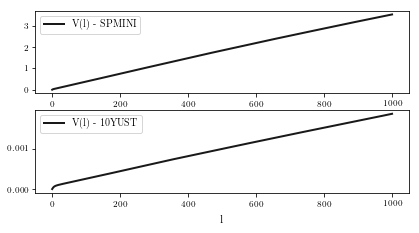

In [9]:
# plot
fig2, (ax2) = plt.subplots(2, 1, figsize=FIGSIZE)

ax2[0].plot(np.arange(max_lag), VarioSPMINI, linewidth=2, label ='V(l) - SPMINI')
ax2[0].set_xlabel('l', fontsize=13)
ax2[0].legend()

ax2[1].plot(np.arange(max_lag), Vario_USB, linewidth=2, label ='V(l) - 10YUST')
ax2[1].set_xlabel('l', fontsize=13)
ax2[1].legend()

plt.savefig('GraphsMD/MarketDataVariogram', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

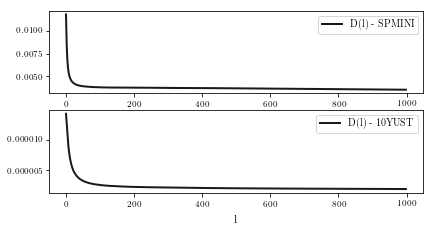

In [10]:
# plot
fig2, (ax2) = plt.subplots(2, 1, figsize=FIGSIZE)

ax2[0].plot(np.arange(max_lag-1), VarioSPMINI[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - SPMINI')
ax2[0].set_xlabel('l', fontsize=13)
ax2[0].legend()

ax2[1].plot(np.arange(max_lag-1), Vario_USB[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - 10YUST')
ax2[1].set_xlabel('l', fontsize=13)
ax2[1].legend()

plt.savefig('GraphsMD/MarketDataSignaturePlot', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

$\underline{\text{Mutli event models}}$

$\underline{\text{RegLin model with }F(u) = sign(u):}$

In [11]:
params21, cov = curve_fit(curve_fittingPL, np.arange(5,L), G_starSPMINI_epsilons[5:L] )
appro21 = curve_fittingPL(np.arange(1,L), *params21)

params22, cov = curve_fit(curve_fittingPL, np.arange(5,L), G_star_USB_epsilons[5:L] )
appro22 = curve_fittingPL(np.arange(1,L), *params22)

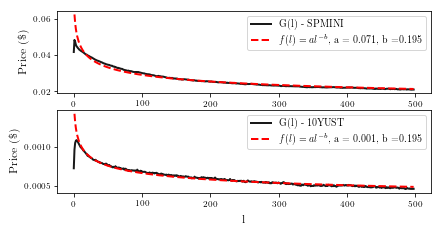

In [12]:
# plot
fig5, (ax5) = plt.subplots(2, 1, figsize=FIGSIZE)

ax5[0].plot(np.arange(L-1), G_starSPMINI_epsilons[1:L], linewidth=2, label ='G(l) - SPMINI')
ax5[0].plot(np.arange(1,L-1), appro21[1:L], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params21[0])[:5] + ', b =' + str(params21[1])[:5] )
ax5[0].set_xlabel('l', fontsize=13)
ax5[0].set_ylabel('Price (\$)', fontsize=13)
ax5[0].legend()

ax5[1].plot(np.arange(L-1), G_star_USB_epsilons[1:L], linewidth=2, label ='G(l) - 10YUST')
ax5[1].plot(np.arange(1,L-1), appro22[1:L], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params22[0])[:5] + ', b =' + str(params22[1])[:5] )
ax5[1].set_xlabel('l', fontsize=13)
ax5[1].set_ylabel('Price (\$)', fontsize=13)
ax5[1].legend()

plt.savefig('GraphsMD/SyntheticDataKernelEpsilons', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

In [13]:
# plot
fig3, (ax3) = plt.subplots(2, 1, figsize=FIGSIZE)

ax3[0].plot(np.arange(max_lag-1), synthetic_variogram_GstarSPMINI_approx_epsilons[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - SPMINI')
ax3[0].set_xlabel('t', fontsize=13)
ax3[0].legend()

ax3[1].plot(np.arange(max_lag-1), synthetic_variogram_Gstar_USB_approx_epsilons[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - 10YUST')
ax3[1].set_xlabel('t', fontsize=13)
ax3[1].legend()

plt.savefig('GraphsMD/SyntheticDataSignaturePlotEpsilons', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

In [14]:
print('R^2 train (returns - SPMINI): %.3f' % R2_GstarSPMINI_approx_epsilons )
print('R^2 train (returns - 10YUST): %.3f' % R2_Gstar_USB_approx_epsilons )

R^2 train (returns - SPMINI): 0.160
R^2 train (returns - 10YUST): 0.063


$\underline{\text{RegLin model with F(u) = u:}}$

In [15]:
params31, cov = curve_fit(curve_fittingPL, np.arange(5,L), GOW_approx[5:L] )
appro31 = curve_fittingPL(np.arange(1,L), *params31)

params32, cov = curve_fit(curve_fittingPL, np.arange(5,L), GOW_approx_USB[5:L] )
appro32 = curve_fittingPL(np.arange(1,L), *params32)

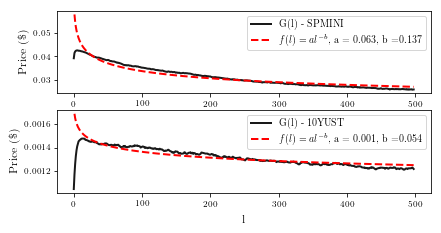

In [16]:
# plot
fig5, (ax5) = plt.subplots(2, 1, figsize=FIGSIZE)

ax5[0].plot(np.arange(L-1), GOW_approx[1:L], linewidth=2, label ='G(l) - SPMINI')
ax5[0].plot(np.arange(1,L-1), appro31[1:L], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params31[0])[:5] + ', b =' + str(params31[1])[:5] )
ax5[0].set_xlabel('l', fontsize=13)
ax5[0].set_ylabel('Price (\$)', fontsize=13)
ax5[0].legend()

ax5[1].plot(np.arange(L-1), GOW_approx_USB[1:L], linewidth=2, label ='G(l) - 10YUST')
ax5[1].plot(np.arange(1,L-1), appro32[1:L], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params32[0])[:5] + ', b =' + str(params32[1])[:5] )
ax5[1].set_xlabel('l', fontsize=13)
ax5[1].set_ylabel('Price (\$)', fontsize=13)
ax5[1].legend()

plt.savefig('GraphsMD/SyntheticDataKernelOW', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

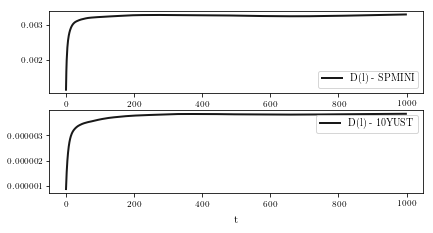

In [17]:
# plot
fig3, (ax3) = plt.subplots(2, 1, figsize=FIGSIZE)

ax3[0].plot(np.arange(max_lag-1), synthetic_variogram_GOW_approx[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - SPMINI')
ax3[0].set_xlabel('t', fontsize=13)
ax3[0].legend()

ax3[1].plot(np.arange(max_lag-1), synthetic_variogram_GOW_approx_USB[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - 10YUST')
ax3[1].set_xlabel('t', fontsize=13)
ax3[1].legend()


plt.savefig('GraphsMD/SyntheticSignaturePlotOW', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

In [18]:
print('R^2 train (returns - SPMINI): %.3f' % R2_OWModel )
print('R^2 train (returns - 10YUST): %.3f' % R2_OWModel_USB )

R^2 train (returns - SPMINI): 0.096
R^2 train (returns - 10YUST): 0.063


$\underline{\text{RegLin model with one kernel and }F(u) = u^{\delta}:}$

In [19]:
params41, cov = curve_fit(curve_fittingPL, np.arange(5,L), GNNPL_approx[5:L] )
appro41 = curve_fittingPL(np.arange(1,L), *params41)

params42, cov = curve_fit(curve_fittingPL, np.arange(5,L), GNNPL_approx_USB[5:L] )
appro42 = curve_fittingPL(np.arange(1,L), *params42)

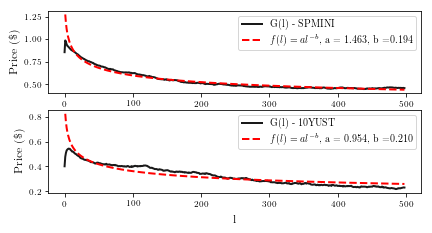

In [20]:
# plot
fig5, (ax5) = plt.subplots(2, 1, figsize=FIGSIZE)

ax5[0].plot(np.arange(L-1), GNNPL_approx[1:L], linewidth=2, label ='G(l) - SPMINI')
ax5[0].plot(np.arange(1,L-1), appro41[1:L], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params41[0])[:5] + ', b =' + str(params41[1])[:5] )
ax5[0].set_xlabel('l', fontsize=13)
ax5[0].set_ylabel('Price (\$)', fontsize=13)
ax5[0].legend()

ax5[1].plot(np.arange(L-1), GNNPL_approx_USB[1:L], linewidth=2, label ='G(l) - 10YUST')
ax5[1].plot(np.arange(1,L-1), appro42[1:L], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params42[0])[:5] + ', b =' + str(params42[1])[:5] )
ax5[1].set_xlabel('l', fontsize=13)
ax5[1].set_ylabel('Price (\$)', fontsize=13)
ax5[1].legend()

plt.savefig('GraphsSynthetic/SyntheticDataKernelsNNPL', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

In [21]:
# plot
fig3, (ax3) = plt.subplots(2, 1, figsize=FIGSIZE)

ax3[0].plot(np.arange(max_lag-1), synthetic_variogram_GNNPL_approx[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - SPMINI')
ax3[0].set_xlabel('t', fontsize=13)
ax3[0].legend()

ax3[1].plot(np.arange(max_lag-1), synthetic_variogram_GNNPL_approx_USB[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - 10YUST')
ax3[1].set_xlabel('t', fontsize=13)
ax3[1].legend()


plt.savefig('GraphsMD/SyntheticDataSignaturePlotNNPL', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

In [22]:
print('R^2 train (returns - SPMINI): %.3f' % R2_PowerModelGNNPL)
print('R^2 train (returns - 10YUST): %.3f' % R2_PowerModelGNNPL_USB)

R^2 train (returns - SPMINI): 0.176
R^2 train (returns - 10YUST): 0.090


$\underline{\text{RegLin model with two kernels and }F_{1}(u) = u^{\delta_{1}} \text{ and } F_{2}(u) = u^{\delta_{2}}:}$

In [23]:
params51, cov = curve_fit(curve_fittingPL, np.arange(5,L), GNNDPL_approx1[5:L] )
appro51 = curve_fittingPL(np.arange(1,L), *params51)

params52, cov = curve_fit(curve_fittingPL, np.arange(5,L), GNNDPL_approx2[5:L] )
appro52 = curve_fittingPL(np.arange(1,L), *params52)

params53, cov = curve_fit(curve_fittingPL, np.arange(5,L), GNNDPL_approx1_USB[5:L] )
appro53 = curve_fittingPL(np.arange(1,L), *params53)

params54, cov = curve_fit(curve_fittingPL, np.arange(5,L), GNNDPL_approx2_USB[5:L] )
appro54 = curve_fittingPL(np.arange(1,L), *params54)

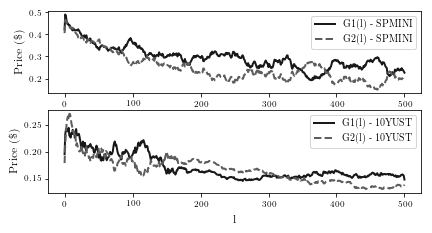

In [24]:
# plot GNNDPL_approx1
fig5, (ax5) = plt.subplots(2, 1, figsize=FIGSIZE)

ax5[0].plot(np.arange(L+1), GNNDPL_approx1[1:], linewidth=2, label ='G1(l) - SPMINI')
ax5[0].plot(np.arange(L+1), GNNDPL_approx2[1:], linewidth=2, label ='G2(l) - SPMINI')
#ax5[0].plot(np.arange(L+1), (GNNDPL_approx2[1:]+GNNDPL_approx2[1:])/2, linewidth=2, label ='(G1(l)+G2(l))/2 ')
#ax5[0].plot(np.arange(1,L-1), appro51[1:L], '--r', linewidth=2, 
#label = r'$f(l) = al^{-b}$' + ', a = ' + str(params51[0])[:5] + ', b =' + str(params51[1])[:5] )
#ax5[0].plot(np.arange(1,L-1), appro52[1:L], '--r', linewidth=2, 
#label = r'$f(l) = al^{-b}$' + ', a = ' + str(params52[0])[:5] + ', b =' + str(params52[1])[:5] )
ax5[0].set_xlabel('l', fontsize=13)
ax5[0].set_ylabel('Price (\$)', fontsize=13)
ax5[0].legend()

ax5[1].plot(np.arange(L+1), GNNDPL_approx1_USB[1:], linewidth=2, label ='G1(l) - 10YUST')
ax5[1].plot(np.arange(L+1), GNNDPL_approx2_USB[1:], linewidth=2, label ='G2(l) - 10YUST')
#ax5[1].plot(np.arange(L+1), (GNNDPL_approx2[1:]+GNNDPL_approx2[1:])/2, linewidth=2, label ='(G1(l)+G2(l))/2 ')
#ax5[1].plot(np.arange(1,L-1), appro53[1:L], '--r', linewidth=2, 
#label = r'$f(l) = al^{-b}$' + ', a = ' + str(params53[0])[:5] + ', b =' + str(params53[1])[:5] )
#ax5[1].plot(np.arange(1,L-1), appro52[1:L], '--r', linewidth=2, 
#label = r'$f(l) = al^{-b}$' + ', a = ' + str(params54[0])[:5] + ', b =' + str(params54[1])[:5] )
ax5[1].set_xlabel('l', fontsize=13)
ax5[1].set_ylabel('Price (\$)', fontsize=13)
ax5[1].legend()

plt.savefig('GraphsSynthetic/SyntheticDataKernelsNNDPL', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

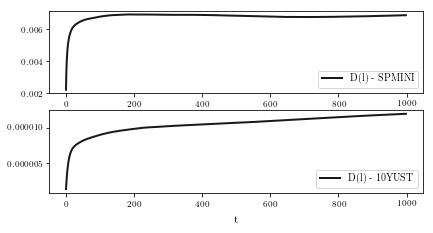

In [25]:
# plot
fig3, (ax3) = plt.subplots(2, 1, figsize=FIGSIZE)

ax3[0].plot(np.arange(max_lag-1), synthetic_variogram_GNNDoublePL_approx[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - SPMINI')
ax3[0].set_xlabel('t', fontsize=13)
ax3[0].legend()

ax3[1].plot(np.arange(max_lag-1), synthetic_variogram_GNNDoublePL_approx_USB[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - 10YUST')
ax3[1].set_xlabel('t', fontsize=13)
ax3[1].legend()


plt.savefig('GraphsMD/SyntheticSignaturePlotNNDPL', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

In [26]:
print('R^2 train (returns - SPMINI): %.3f' % R2_DoublePowerModel)
print('R^2 train (returns - 10YUST): %.3f' % R2_DoublePowerModel_USB)

R^2 train (returns - SPMINI): 0.176
R^2 train (returns - 10YUST): 0.090


$\underline{\text{RegLin model with }F(u) = \log(1+u):}$

In [27]:
params61, cov = curve_fit(curve_fittingPL, np.arange(5,L), Glog_approx[5:L] )
appro61 = curve_fittingPL(np.arange(1,L), *params61)

params62, cov = curve_fit(curve_fittingPL, np.arange(5,L), Glog_approx_USB[5:L] )
appro62 = curve_fittingPL(np.arange(1,L), *params62)

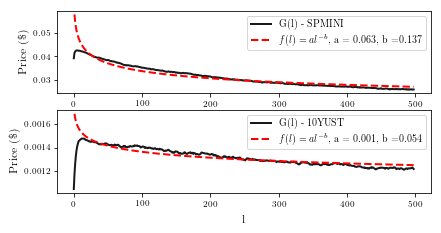

In [28]:
# plot
fig5, (ax5) = plt.subplots(2, 1, figsize=FIGSIZE)

ax5[0].plot(np.arange(L-1), Glog_approx[1:L], linewidth=2, label ='G(l) - SPMINI')
ax5[0].plot(np.arange(1,L-1), appro61[1:L], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params61[0])[:5] + ', b =' + str(params61[1])[:5] )
ax5[0].set_xlabel('l', fontsize=13)
ax5[0].set_ylabel('Price (\$)', fontsize=13)
ax5[0].legend()

ax5[1].plot(np.arange(L-1), Glog_approx_USB[1:L], linewidth=2, label ='G(l) - 10YUST')
ax5[1].plot(np.arange(1,L-1), appro62[1:L], '--r', linewidth=2, 
label = r'$f(l) = al^{-b}$' + ', a = ' + str(params62[0])[:5] + ', b =' + str(params62[1])[:5] )
ax5[1].set_xlabel('l', fontsize=13)
ax5[1].set_ylabel('Price (\$)', fontsize=13)
ax5[1].legend()

plt.savefig('GraphsSynthetic/SyntheticDataKernelsLog', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

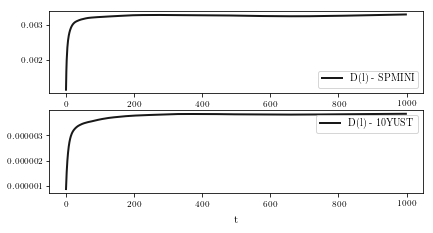

In [29]:
# plot
fig3, (ax3) = plt.subplots(2, 1, figsize=FIGSIZE)

ax3[0].plot(np.arange(max_lag-1), synthetic_variogram_Glog_approx[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - SPMINI')
ax3[0].set_xlabel('t', fontsize=13)
ax3[0].legend()

ax3[1].plot(np.arange(max_lag-1), synthetic_variogram_Glog_approx_USB[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - 10YUST')
ax3[1].set_xlabel('t', fontsize=13)
ax3[1].legend()

plt.savefig('GraphsMD/SyntheticDataSignaturePlotNNDPL', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

In [30]:
print('R^2 train (returns - SPMINI): %.3f' % R2_LogModel)
print('R^2 train (returns - 10YUST): %.3f' % R2_LogModel_USB)

R^2 train (returns - SPMINI): 0.096
R^2 train (returns - 10YUST): 0.063


$\underline{\text{Single event models}}$

$\underline{\text{linear with order sign}}$

In [31]:
print('for SPMINI G(1) = ', str(OEG_starSPMINI_epsilons.values[1]))
print('for 10YUST G(1) = ', str(OEG_starUSB_epsilons.values[1]))

for SPMINI G(1) =  0.04334142961859207
for 10YUST G(1) =  0.0009108823042584425


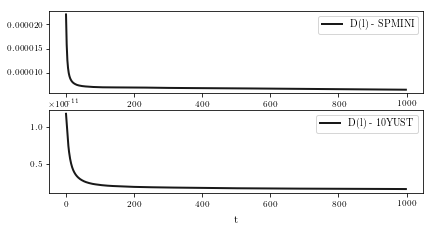

In [32]:
# plot
fig3, (ax3) = plt.subplots(2, 1, figsize=FIGSIZE)

ax3[0].plot(np.arange(max_lag-1), OEsynthetic_variogram_GstarSPMINI_approx_epsilons[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - SPMINI')
ax3[0].set_xlabel('t', fontsize=13)
ax3[0].legend()

ax3[1].plot(np.arange(max_lag-1), OEsynthetic_variogram_GstarUSB_approx_epsilons[1:]/np.arange(1,max_lag), linewidth=2, label ='D(l) - 10YUST')
ax3[1].set_xlabel('t', fontsize=13)
ax3[1].legend()

plt.savefig('GraphsMD/SyntheticDataSignaturePlotOEepsilons', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)
plt.show()

In [33]:
print('R^2 train (returns - SPMINI): %.3f' % OER2_GstarSPMINI_approx_epsilons)
print('R^2 train (returns - 10YUST): %.3f' % OER2_GstarSPMINI_approx_epsilons)

R^2 train (returns - SPMINI): 0.085
R^2 train (returns - 10YUST): 0.085


$\underline{\text{Signature plots}}$

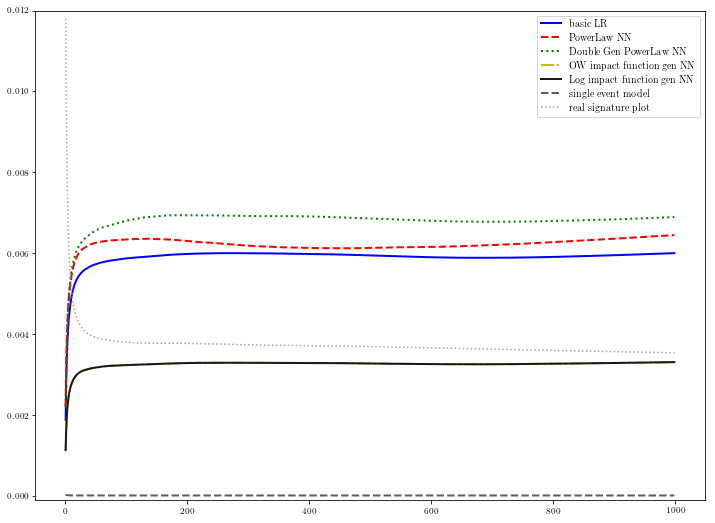

In [34]:
fig, (ax1) = plt.subplots(1, 1, figsize = [12,9])

ax1.plot(np.arange(1,max_lag), synthetic_variogram_GstarSPMINI_approx_epsilons[1:]/np.arange(1,max_lag), 'b', linewidth=2, label ='basic LR')
ax1.plot(np.arange(1,max_lag), synthetic_variogram_GNNPL_approx[1:]/np.arange(1,max_lag), 'r', linewidth=2, label ='PowerLaw NN')
ax1.plot(np.arange(1,max_lag), synthetic_variogram_GNNDoublePL_approx[1:]/np.arange(1,max_lag), 'g', linewidth=2, label ='Double Gen PowerLaw NN')
ax1.plot(np.arange(1,max_lag), synthetic_variogram_GOW_approx[1:]/np.arange(1,max_lag), 'y', linewidth=2, label ='OW impact function gen NN')
ax1.plot(np.arange(1,max_lag), synthetic_variogram_Glog_approx[1:]/np.arange(1,max_lag), linewidth=2, label ='Log impact function gen NN')
ax1.plot(np.arange(1,max_lag), OEsynthetic_variogram_GstarSPMINI_approx_epsilons[1:]/np.arange(1,max_lag), linewidth=2, label ='single event model')


ax1.plot(np.arange(1,max_lag), VarioSPMINI[1:]/np.arange(1,max_lag), label = 'real signature plot')

ax1.set_ylim((-1e-4,1.2e-2))
ax1.legend()
plt.savefig('GraphsMD/comparison_signature_plots_SPMINI', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)

In [35]:
fig, (ax1) = plt.subplots(1, 1, figsize = [12,9])

ax1.plot(np.arange(1,max_lag), synthetic_variogram_Gstar_USB_approx_epsilons[1:]/np.arange(1,max_lag), 'b', linewidth=2, label ='basic LR')
ax1.plot(np.arange(1,max_lag), synthetic_variogram_GNNPL_approx_USB[1:]/np.arange(1,max_lag), 'r', linewidth=2, label ='PowerLaw NN')
ax1.plot(np.arange(1,max_lag), synthetic_variogram_GNNDoublePL_approx_USB[1:]/np.arange(1,max_lag), 'g', linewidth=2, label ='Double Gen PowerLaw NN')
ax1.plot(np.arange(1,max_lag), synthetic_variogram_GOW_approx_USB[1:]/np.arange(1,max_lag), 'y', linewidth=2, label ='OW impact function gen NN')
ax1.plot(np.arange(1,max_lag), synthetic_variogram_Glog_approx_USB[1:]/np.arange(1,max_lag), linewidth=2, label ='Log impact function gen NN')
ax1.plot(np.arange(1,max_lag), OEsynthetic_variogram_GstarUSB_approx_epsilons[1:]/np.arange(1,max_lag), linewidth=2, label ='single event model')

ax1.plot(np.arange(1,max_lag), Vario_USB[1:]/np.arange(1,max_lag), label = 'real signature plot')

ax1.set_ylim((-1e-7,1.2e-5))
ax1.legend()
plt.savefig('GraphsMD/comparison_signature_plots_10YUST', format='pdf', bbox_inches='tight', pad_inches=0.05, dpi=100)